In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("paint.csv")

display(data.head())
display(data.corr())

,Relative humidity (%),type,Evaporation (% wt)
0,35.3,1,11.2
1,29.6,1,11.0
2,31.0,1,12.6
3,58.0,1,8.3
4,62.0,1,10.1


,Relative humidity (%),type,Evaporation (% wt)
Relative humidity (%),1.000000,-0.139497,-0.616373
type,-0.139497,1.000000,0.780310
Evaporation (% wt),-0.616373,0.780310,1.000000


(array([2., 4., 4., 4., 4., 5., 2., 1., 3., 2.]),
 array([ 4. ,  4.9,  5.8,  6.7,  7.6,  8.5,  9.4, 10.3, 11.2, 12.1, 13. ]),
 <BarContainer object of 10 artists>)

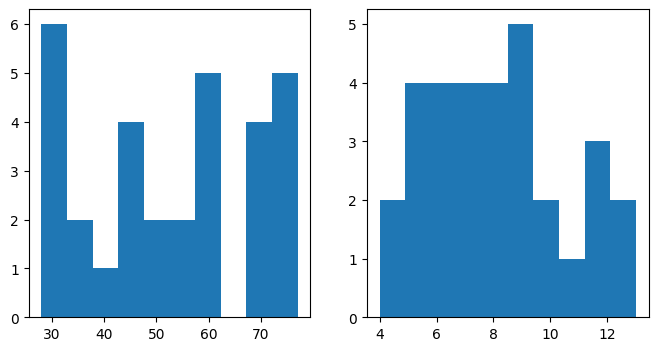

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
X = data["Relative humidity (%)"]
Y = data["Evaporation (% wt)"]

ax[0].hist(X, bins=10)
ax[1].hist(Y, bins=10)

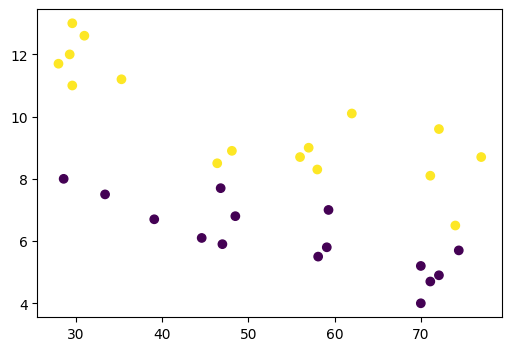

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(X, Y, c=data["type"])

0.12054137976800054 0.6571380814471293


Text(0, 0.5, 'Evaporation (% wt)')

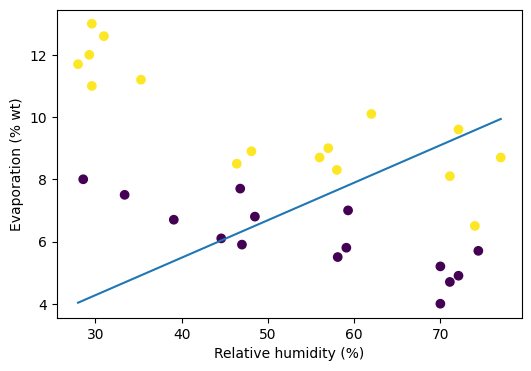

In [5]:
def loss_function(m, b, points):
    total_error = 0
    n = len(points)
    for i in range(n):
        x = points["Relative humidity (%)"].iloc[i]
        y = points["Evaporation (% wt)"].iloc[i]
        total_error += (y - (m*x+b))**2
    return total_error / float(n)

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points["Relative humidity (%)"].iloc[i]
        y = points["Evaporation (% wt)"].iloc[i]

        m_gradient += -(2/n)* x * (y - (m_now * x + b_now))
        b_gradient += -(2/n)* (y - (m_now * x + b_now))
    
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m, b

m = 0
b = 0
L = 0.0003
epochs = 1000

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)

print(m, b)

X = data["Relative humidity (%)"]
Y = data["Evaporation (% wt)"]

xline = np.linspace(X.min(), X.max(), 100)

plt.figure(figsize=(6,4))
plt.scatter(X, Y, c=data["type"])
plt.plot(xline, m*xline+b)

plt.xlabel("Relative humidity (%)")
plt.ylabel("Evaporation (% wt)")


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), Y)

print(model.coef_, model.intercept_)

[-0.09176588] 12.860205655119877


In [7]:

def train_test_split(data, train=80, test=20): 
    if train + test != 100:
        raise ValueError("Training data and test data must add up to 100%")
    
    data = np.asarray(data).copy()
    n = data.shape[0]
    split_index = int(n * (train/100))

    np.random.shuffle(data)

    trainingData = data[:split_index,:]
    testData = data[split_index:,:]

    return trainingData, testData

trainD, testD = train_test_split(data)

type(trainD)


numpy.ndarray

In [8]:
matrix1 = np.ones((5,1), int)

matrix1#.reshape(-1, 1)

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
n = data.shape[0]
rValues = {}
for col1 in data.columns:
    nameA = col1
    X1 = data[col1]
    meanX1 = np.mean(X1)
    varA = (sum([(x - meanX1)**2 for x in X1]))/(n-1)
    for col2 in data.columns:
        nameB = col2
        X2 = data[col2]
        meanX2 = np.mean(X2)
        cov = (sum([(x - meanX1)*(y - meanX2) for x, y in zip(X1, X2)]))/(n-1)
        varB = (sum([(x - meanX2)**2 for x in X2]))/(n-1)
        r = cov/np.sqrt(varA * varB) 
        rValues[f"{nameA} / {nameB}"] = r

print(rValues)

{'Relative humidity (%) : Relative humidity (%)': np.float64(1.0), 'Relative humidity (%) : type': np.float64(-0.13949744744898016), 'Relative humidity (%) : Evaporation (% wt)': np.float64(-0.6163725787484474), 'type : Relative humidity (%)': np.float64(-0.13949744744898016), 'type : type': np.float64(1.0), 'type : Evaporation (% wt)': np.float64(0.7803098858188214), 'Evaporation (% wt) : Relative humidity (%)': np.float64(-0.6163725787484474), 'Evaporation (% wt) : type': np.float64(0.7803098858188214), 'Evaporation (% wt) : Evaporation (% wt)': np.float64(1.0)}


In [ ]:
cols = data.columns
n, d = data.shape
X = data.to_numpy(dtype=float)
corr = {}

means = np.mean(X, axis=0)
variances = np.var(X, axis=0, ddof=1)

for i in range(d):
    
    for j in range(d):
        
        cov = 
        varB = (sum([(x - meanX2)**2 for x in X2]))/(n-1)
        r = cov/np.sqrt(varA * varB) 
        rValues[f"{nameA} / {nameB}"] = r